# Workflows de Análise de Dados e Geoestatística

## Módulo 3 - Criando Modelos Lineares

O objetivo deste módulo e criar um modelo linear (regressão linear simples e múltipla)

### Imports

In [1]:
# paths
import os

# pandas
import pandas as pd

# data viz
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# configuring plots of seaborn
sns.set_style("ticks", {'axes.grid':False})
sns.set_context("notebook", font_scale=1.5)

### Helper functions

In [3]:
# directories
def get_directories():
    # getting working paths
    CURRENT_DIR = os.path.dirname(os.path.realpath('__file__'))
    PARENT_DIR = os.path.dirname(CURRENT_DIR)
    #QUERY_DIR = os.path.join(CURRENT_DIR, 'queries')
    DATA_DIR = os.path.join(PARENT_DIR, 'data')
    
    dirs = {
        "CURRENT_DIR" : CURRENT_DIR,
        "PARENT_DIR" : PARENT_DIR,
        #"QUERY_DIR" : QUERY_DIR,
        "DATA_DIR" : DATA_DIR
    }

    return (dirs)


# metadados sobre dataframe
def meta_df(df):
    return pd.DataFrame({'dtypes': df.dtypes,
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100, 2),
                         'size': df.shape[0]}, index = df.columns)

In [4]:
get_directories()

{'CURRENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\modulo_3',
 'PARENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data',
 'DATA_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\data'}

In [5]:
# importing data

data_dirs = get_directories()
df_jura = pd.read_csv(os.path.join(data_dirs["DATA_DIR"],"silver_jura.csv"))
df_jura.head(10)

,vlLocX,vlLocY,descLanduse,descUnit,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,status,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn,descAnomalyZn
0,1.932,1.004,campo,argoviano,0.135,4.520,15.08,5.24,37.00,32.56,NaN,0.00,0.14,0.02,0.03,0.28,0.04,normal
1,1.824,0.999,campo,argoviano,0.165,3.752,18.60,7.08,56.40,44.00,NaN,0.00,0.07,0.06,0.07,0.68,0.12,normal
2,1.883,1.176,campo,argoviano,0.195,3.920,21.80,7.52,49.60,43.20,NaN,0.01,0.10,0.12,0.10,0.56,0.10,normal
3,1.837,1.037,campo,argoviano,0.215,3.880,23.00,8.16,46.80,44.00,NaN,0.01,0.09,0.14,0.11,0.51,0.12,normal
4,3.768,2.775,floresta,kimmeridgiano,0.220,10.800,26.32,17.52,31.88,45.20,NaN,0.02,0.60,0.20,0.37,0.11,0.14,normal
5,1.839,0.995,campo,argoviano,0.225,4.240,24.88,10.12,55.60,56.00,NaN,0.02,0.12,0.17,0.16,0.68,0.26,normal
6,2.537,3.768,campo,argoviano,0.230,3.792,18.20,5.68,26.84,32.08,NaN,0.02,0.08,0.04,0.05,0.04,0.03,normal
7,2.502,3.988,campo,argoviano,0.240,3.760,18.92,5.20,22.36,32.24,NaN,0.03,0.08,0.06,0.03,0.02,0.04,normal
8,1.842,0.989,campo,argoviano,0.240,4.520,27.96,11.32,52.40,56.40,NaN,0.03,0.14,0.26,0.20,0.62,0.26,normal
9,1.897,1.220,campo,argoviano,0.260,3.480,16.24,4.76,27.00,27.20,NaN,0.04,0.04,0.03,0.01,0.05,0.01,normal


In [6]:
grade_features = ["vlCadmium", "vlCobalt", "vlChromium", "vlNickel", "vlLead", "vlZinc", "descUnit"]
grade_features

['vlCadmium',
 'vlCobalt',
 'vlChromium',
 'vlNickel',
 'vlLead',
 'vlZinc',
 'descUnit']

#### Creating linear models

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
#import plotly.graph_objects as go

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'X': 'vlCadmium',
 'Y': 'vlZinc',
 'coef': 20.925923239458072}

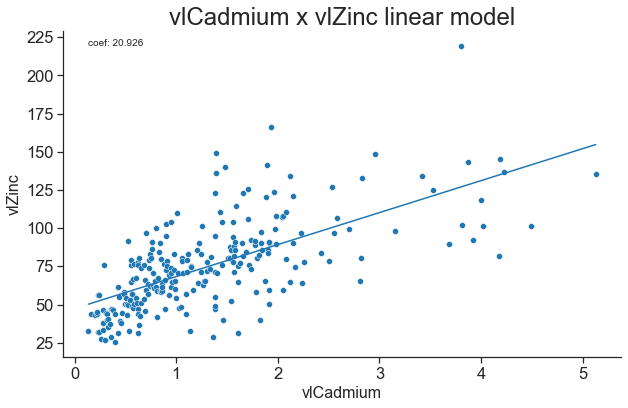

In [8]:
def linear_model_pair (df, x_elem, y_elem):

  # objeto Regressor
  reg = LinearRegression()

  xm = df[x_elem].values[:,np.newaxis]
  xm_plot = [a[0] for a in xm]
  ym = df[y_elem].values

  # fit and predict
  reg.fit(X=xm, y=ym)
  line = reg.predict(xm)
  
  # model info
  model_dict = reg.get_params()
  model_dict['X'], model_dict['Y'] = x_elem, y_elem
  model_dict['coef'] = reg.coef_[0]


  # plotting
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=xm_plot, y=ym[:])
  p = sns.lineplot(x=xm_plot, y=line)

  p.set_title(f"{x_elem} x {y_elem} linear model", fontsize=24)
  p.set_xlabel(x_elem, fontsize=16)
  p.set_ylabel(y_elem, fontsize=16)
  plt.text(min(xm_plot), max(ym[:]), f"coef: {round(reg.coef_[0],3)}")
  sns.despine()
  
  return model_dict

linear_model_pair(df_jura, "vlCadmium", "vlZinc")

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'X': 'vlZinc',
 'Y': 'vlNickel',
 'coef': 0.1825203236441981}

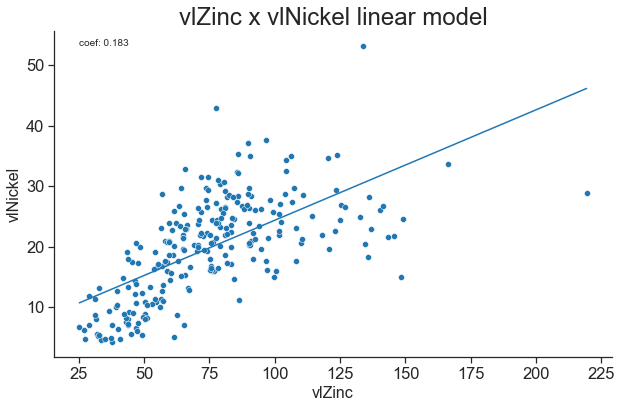

In [9]:
linear_model_pair(df_jura, "vlZinc", "vlNickel")

In [10]:
grade_features.remove('descUnit')
grade_features

['vlCadmium', 'vlCobalt', 'vlChromium', 'vlNickel', 'vlLead', 'vlZinc']

In [11]:
def linear_model_multiple (df, grade_features, y_elem):
  
  # Regressor
  reg = LinearRegression()
  
  grade_x = grade_features.copy()
  grade_x.remove(y_elem)

  xm = df[grade_x].values
  ym = df[y_elem].values

  reg.fit(X=xm, y=ym)
  score = reg.score(X=xm, y=ym)
  y_pred = reg.predict(xm)

  model_dict = {
    'model': reg,
    'element':y_elem,
    'score': score, 
    'pred': y_pred,
    'params': reg.get_params()
  }

  return model_dict

model = linear_model_multiple(df_jura, grade_features, 'vlNickel')
model

{'model': LinearRegression(),
 'element': 'vlNickel',
 'score': 0.7379665282676895,
 'pred': array([ 6.68413626,  7.16045423,  8.10315763,  8.35113888, 17.53168175,
         9.62014989,  6.51113883,  6.59962391, 10.73211176,  5.56934829,
         5.65545421,  6.65877691, 14.20365434, 19.81615526,  6.98652154,
         6.97595242,  7.01041014,  9.29597322,  6.69644477,  5.95625363,
         8.1708807 ,  7.6468843 , 12.06032749,  7.25054516, 15.24014418,
         8.15990672, 16.91517565,  7.67402964,  9.361945  , 13.10845346,
         8.54165114,  5.4933088 ,  9.27183828, 16.01637316, 15.93011308,
        17.34681799, 13.37890977, 10.37983782, 12.38689242,  8.14569711,
        22.26956457,  8.4619326 , 13.89180356, 17.56341374, 24.32281599,
        17.91138602, 12.01851752, 15.29106661, 19.23786586, 11.24897607,
        17.36500323, 13.92288978, 21.01292095, 12.16637871, 17.48280995,
        11.75615758, 12.5192524 , 23.61603592,  8.38649946, 15.05051891,
        21.91384081,  8.25728838